In [8]:
%load_ext autoreload
%autoreload 2

In [25]:
import numpy as np
from dynamic_panel_dgp import DynamicPanelDGP
import matplotlib.pyplot as plt
import scipy 
from coverage_panel_hetero import add_vlines

In [39]:
import joblib
import os
n_exps = 10
dirname = os.path.join('results', 'hetero')
param_str = ("n_exps_{}_n_units_500_n_periods_3_n_t_2_n_x_450_s_x_2"
             "_s_t_2_sigma_x_1_sigma_t_1_sigma_y_1_conf_str_1_gamma_0.2_het_str_1").format(n_exps)
results = joblib.load(os.path.join(dirname, "hetero_results_{}.jbl".format(param_str)))
dgp = joblib.load(os.path.join(dirname, "hetero_dgp_obj_{}.jbl".format(param_str)))
hetero_inds = joblib.load(os.path.join(dirname, "hetero_hetero_inds_{}.jbl".format(param_str)))
test_policies = joblib.load(os.path.join(dirname, "hetero_test_policies_{}.jbl".format(param_str)))

In [40]:
n_periods = dgp.n_periods
n_treatments = dgp.n_treatments
true_hetero_inds = dgp.hetero_inds
n_x = dgp.n_x

In [41]:
param_results = np.array([r[0] for r in results])
points = param_results[:, 0]
lowers = param_results[:, 1]
uppers = param_results[:, 2]
stderrs = param_results[:, 3]
policy_results = np.array([r[1] for r in results])
policy_effect_hat = policy_results[:, 0]
policy_effect_lowers = policy_results[:, 1]
policy_effect_uppers = policy_results[:, 2]
policy_effect_stderrs = policy_results[:, 3]

In [42]:
true_effect_inds = []
for t in range(n_treatments):
    true_effect_inds += [t * (1 + n_x)] + \
        list(t * (1 + n_x) + 1 + hetero_inds)
true_effect_params = dgp.true_hetero_effect[:, true_effect_inds].flatten()

true_policy_effect = np.array([dgp.static_policy_effect(
    tau, mc_samples=1000) for tau in test_policies])

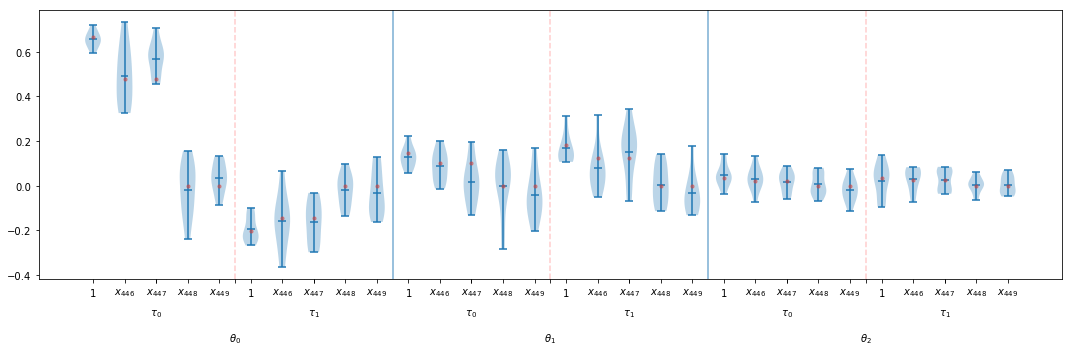

In [43]:
plt.figure(figsize=(15, 5))
inds = np.arange(points.shape[1])
plt.violinplot(points, positions=inds, showmeans=True)
plt.scatter(inds, true_effect_params, marker='o',
            color='#D43F3A', s=10, zorder=3, alpha=.5)
add_vlines(n_periods, n_treatments, hetero_inds)
plt.show()

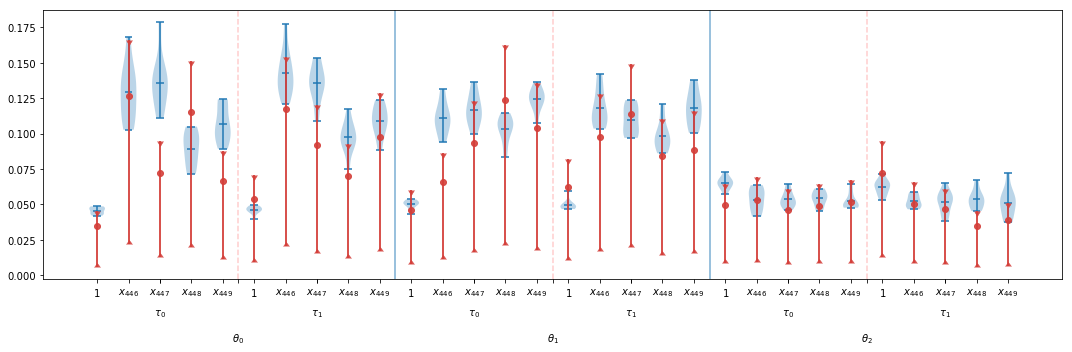

In [44]:
plt.figure(figsize=(15, 5))
inds = np.arange(points.shape[1])
plt.violinplot(stderrs, positions=inds, showmeans=True)
true_std = np.std(points, axis=0)
true_std_error = (true_std * (np.sqrt((n_exps-1)/scipy.stats.chi2.ppf((1-.05/2), n_exps-1)) - 1),
                  true_std * (1 - np.sqrt((n_exps-1)/scipy.stats.chi2.ppf((.05/2), n_exps-1))))
plt.errorbar(inds, true_std, yerr=true_std_error, fmt='o',
            color='#D43F3A', elinewidth=2, alpha=.9, capthick=.5, uplims=True, lolims=True)
add_vlines(n_periods, n_treatments, hetero_inds)
plt.show()

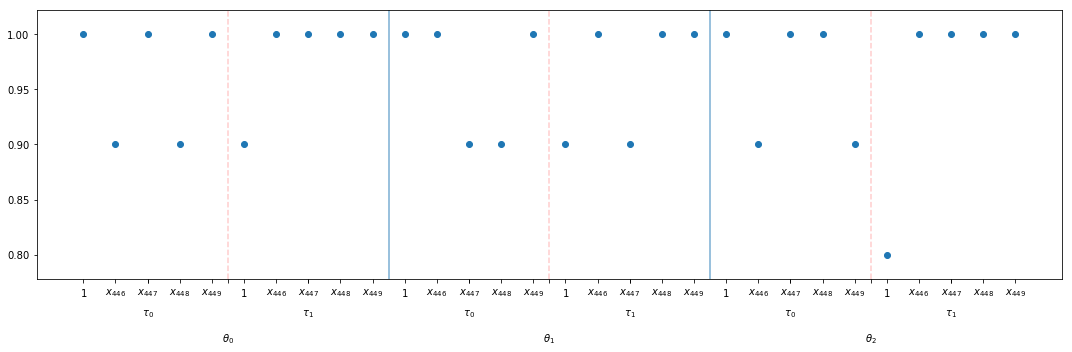

In [45]:
coverage = np.mean((true_effect_params.reshape(1, -1) <= uppers) & (
    true_effect_params.reshape(1, -1) >= lowers), axis=0)
plt.figure(figsize=(15, 5))
inds = np.arange(points.shape[1])
plt.scatter(inds, coverage)
add_vlines(n_periods, n_treatments, hetero_inds)
plt.show()

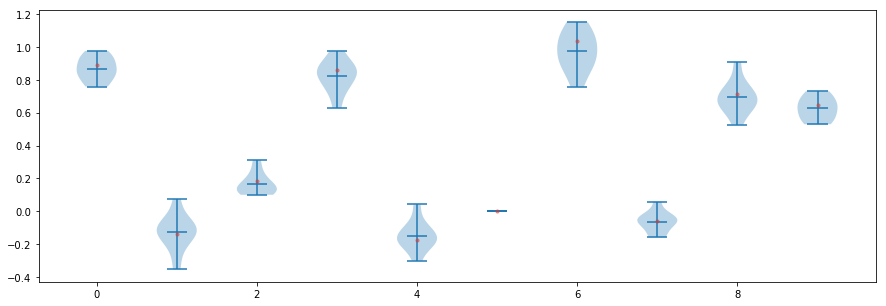

In [46]:
plt.figure(figsize=(15, 5))
inds = np.arange(policy_effect_hat.shape[1])
plt.violinplot(policy_effect_hat, positions=inds, showmeans=True)
plt.scatter(inds, true_policy_effect, marker='o',
            color='#D43F3A', s=10, zorder=3, alpha=.5)
plt.show()

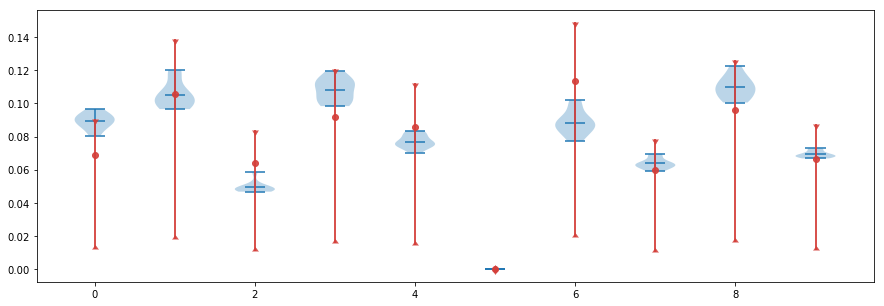

In [47]:
plt.figure(figsize=(15, 5))
inds = np.arange(policy_effect_hat.shape[1])
plt.violinplot(policy_effect_stderrs, positions=inds, showmeans=True)
true_std = np.std(policy_effect_hat, axis=0)
true_std_error = (true_std * (np.sqrt((n_exps - 1) / scipy.stats.chi2.ppf((1 - .05 / 2), n_exps - 1)) - 1),
                  true_std * (1 - np.sqrt((n_exps - 1) / scipy.stats.chi2.ppf((.05 / 2), n_exps - 1))))
plt.errorbar(inds, true_std, yerr=true_std_error, fmt='o',
             color='#D43F3A', elinewidth=2, alpha=.9, capthick=.5, uplims=True, lolims=True)
plt.show()

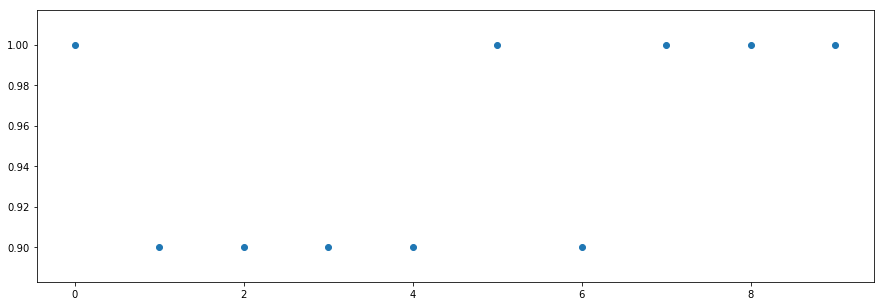

In [48]:
policy_coverage = np.mean((true_policy_effect.reshape(1, -1) <= policy_effect_uppers) & (
    true_policy_effect.reshape(1, -1) >= policy_effect_lowers), axis=0)
plt.figure(figsize=(15, 5))
inds = np.arange(policy_coverage.shape[0])
plt.scatter(inds, policy_coverage)
plt.show()